In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [5]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [6]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [7]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
108451,Thankful,All Over Down Under,['Kristina Olsen'],0.583,0.0328,0.715000,0.000017,0.7390,0.3220,0.1990,82.194,182160,2002
1122870,Handclap Shadack,It Can Do,['Moka Only'],0.854,0.2720,0.524000,0.021300,0.2240,0.6790,0.5450,94.963,144403,2020
674653,Gangbang Music,The Ridah,"['Spice 1', 'Tha Eastsidaz']",0.857,0.2650,0.044400,0.000000,0.2450,0.7730,0.7000,96.019,247960,2004
1184750,Homecoming,Reclaimed Glories (Cinematic Heavy Metal),['Songs To Your Eyes'],0.398,0.0423,0.000071,0.953000,0.2530,0.1600,0.6160,89.965,177688,2020
429706,Water Into Wine,Hell or Highwater,['Desolation Angels'],0.448,0.0415,0.000210,0.056600,0.0900,0.6250,0.8340,96.317,260720,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068118,Prove It to Me,Baddest Human,['Surf'],0.844,0.4640,0.113000,0.000000,0.1370,0.4920,0.4520,156.010,196923,2020
161383,Woods,Blood Bank,['Bon Iver'],0.193,0.0921,0.936000,0.224000,0.1020,0.1620,0.3520,77.129,285440,2009
597588,Murder,Technobabylon Original Soundtrack,['Nathan Allen Pinard'],0.170,0.0455,0.912000,0.941000,0.0995,0.0391,0.3230,63.404,91800,2015
740357,Who Make It Hotter (feat. Yero Brock),Dear Diary,"['Cha Cha', 'Yero Brock']",0.668,0.2770,0.007040,0.000008,0.0949,0.7520,0.6320,131.781,243933,1999


In [8]:
sampled_data["Tempo"].max()

231.753

In [9]:
sampled_data["Tempo"].min()

0.0

In [10]:
tempo_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
tempo_groupings = ["Tempo <=25", "Tempo 25-50", "Tempo 50-75", "Tempo 75-100",
                "Tempo 100-125", "Tempo 125-150", "Tempo 150-175", "Tempo 175-200",
                          "Tempo 200-225", "Tempo 225-250"]
sampled_data["Tempo"] = pd.cut(sampled_data["Tempo"], tempo_bins, labels=tempo_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
108451,Thankful,All Over Down Under,['Kristina Olsen'],0.583,0.0328,0.715000,0.000017,0.7390,0.3220,0.1990,Tempo 75-100,182160,2002
1122870,Handclap Shadack,It Can Do,['Moka Only'],0.854,0.2720,0.524000,0.021300,0.2240,0.6790,0.5450,Tempo 75-100,144403,2020
674653,Gangbang Music,The Ridah,"['Spice 1', 'Tha Eastsidaz']",0.857,0.2650,0.044400,0.000000,0.2450,0.7730,0.7000,Tempo 75-100,247960,2004
1184750,Homecoming,Reclaimed Glories (Cinematic Heavy Metal),['Songs To Your Eyes'],0.398,0.0423,0.000071,0.953000,0.2530,0.1600,0.6160,Tempo 75-100,177688,2020
429706,Water Into Wine,Hell or Highwater,['Desolation Angels'],0.448,0.0415,0.000210,0.056600,0.0900,0.6250,0.8340,Tempo 75-100,260720,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068118,Prove It to Me,Baddest Human,['Surf'],0.844,0.4640,0.113000,0.000000,0.1370,0.4920,0.4520,Tempo 150-175,196923,2020
161383,Woods,Blood Bank,['Bon Iver'],0.193,0.0921,0.936000,0.224000,0.1020,0.1620,0.3520,Tempo 75-100,285440,2009
597588,Murder,Technobabylon Original Soundtrack,['Nathan Allen Pinard'],0.170,0.0455,0.912000,0.941000,0.0995,0.0391,0.3230,Tempo 50-75,91800,2015
740357,Who Make It Hotter (feat. Yero Brock),Dear Diary,"['Cha Cha', 'Yero Brock']",0.668,0.2770,0.007040,0.000008,0.0949,0.7520,0.6320,Tempo 125-150,243933,1999


In [11]:
#getting count of each category and converting to percentage for pie chart
tempo_lessthan_25 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo <=25'].count())/12040)*100
tempo_lessthan_25

Song Title          0.249169
Album Title         0.249169
Artists             0.249169
Danceability        0.249169
Speechiness         0.249169
Acousticness        0.249169
Instrumentalness    0.249169
Liveness            0.249169
Valence             0.249169
Energy              0.249169
Tempo               0.249169
Duration(ms)        0.249169
Release Year        0.249169
dtype: float64

In [12]:
tempo_25to50 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 25-50'].count())/12040)*100
tempo_25to50

Song Title          0.124585
Album Title         0.124585
Artists             0.124585
Danceability        0.124585
Speechiness         0.124585
Acousticness        0.124585
Instrumentalness    0.124585
Liveness            0.124585
Valence             0.124585
Energy              0.124585
Tempo               0.124585
Duration(ms)        0.124585
Release Year        0.124585
dtype: float64

In [13]:
tempo_50to75 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 50-75'].count())/12040)*100
tempo_50to75

Song Title          5.490033
Album Title         5.490033
Artists             5.490033
Danceability        5.490033
Speechiness         5.490033
Acousticness        5.490033
Instrumentalness    5.490033
Liveness            5.490033
Valence             5.490033
Energy              5.490033
Tempo               5.490033
Duration(ms)        5.490033
Release Year        5.490033
dtype: float64

In [14]:
tempo_75to100 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 75-100'].count())/12040)*100
tempo_75to100

Song Title          26.561462
Album Title         26.561462
Artists             26.561462
Danceability        26.561462
Speechiness         26.561462
Acousticness        26.561462
Instrumentalness    26.561462
Liveness            26.561462
Valence             26.561462
Energy              26.561462
Tempo               26.561462
Duration(ms)        26.561462
Release Year        26.561462
dtype: float64

In [15]:
tempo_100to125 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 100-125'].count())/12040)*100
tempo_100to125

Song Title          29.16113
Album Title         29.16113
Artists             29.16113
Danceability        29.16113
Speechiness         29.16113
Acousticness        29.16113
Instrumentalness    29.16113
Liveness            29.16113
Valence             29.16113
Energy              29.16113
Tempo               29.16113
Duration(ms)        29.16113
Release Year        29.16113
dtype: float64

In [16]:
tempo_125to150 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 125-150'].count())/12040)*100
tempo_125to150

Song Title          24.410299
Album Title         24.410299
Artists             24.410299
Danceability        24.410299
Speechiness         24.410299
Acousticness        24.410299
Instrumentalness    24.410299
Liveness            24.410299
Valence             24.410299
Energy              24.410299
Tempo               24.410299
Duration(ms)        24.410299
Release Year        24.410299
dtype: float64

In [17]:
tempo_150to175 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 150-175'].count())/12040)*100
tempo_150to175

Song Title          9.667774
Album Title         9.667774
Artists             9.667774
Danceability        9.667774
Speechiness         9.667774
Acousticness        9.667774
Instrumentalness    9.667774
Liveness            9.667774
Valence             9.667774
Energy              9.667774
Tempo               9.667774
Duration(ms)        9.667774
Release Year        9.667774
dtype: float64

In [18]:
tempo_175to200 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 175-200'].count())/12040)*100
tempo_175to200

Song Title          3.803987
Album Title         3.803987
Artists             3.803987
Danceability        3.803987
Speechiness         3.803987
Acousticness        3.803987
Instrumentalness    3.803987
Liveness            3.803987
Valence             3.803987
Energy              3.803987
Tempo               3.803987
Duration(ms)        3.803987
Release Year        3.803987
dtype: float64

In [19]:
tempo_200to225 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 200-225'].count())/12040)*100
tempo_200to225

Song Title          0.523256
Album Title         0.523256
Artists             0.523256
Danceability        0.523256
Speechiness         0.523256
Acousticness        0.523256
Instrumentalness    0.523256
Liveness            0.523256
Valence             0.523256
Energy              0.523256
Tempo               0.523256
Duration(ms)        0.523256
Release Year        0.523256
dtype: float64

In [20]:
tempo_225to250 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 225-250'].count())/12040)*100
tempo_225to250

Song Title          0.008306
Album Title         0.008306
Artists             0.008306
Danceability        0.008306
Speechiness         0.008306
Acousticness        0.008306
Instrumentalness    0.008306
Liveness            0.008306
Valence             0.008306
Energy              0.008306
Tempo               0.008306
Duration(ms)        0.008306
Release Year        0.008306
dtype: float64

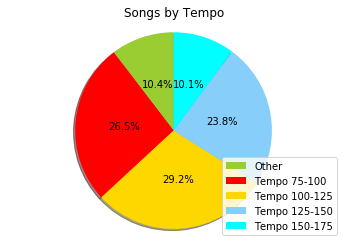

In [25]:
#pie chart
#other includes "Tempo<=25 @ .265781%", "Tempo 25-50 @.207641%", 
#"Tempo 50-75 @5.456811%", "Tempo 175-200 @3.887043", Tempo 200-225 @.564784%", "Tempo 225-250 @.008306%"

labels = ["Other", "Tempo 75-100", "Tempo 100-125", "Tempo 125-150", "Tempo 150-175"]
sizes = [10.390366, 26.478405, 29.186047, 23.795681, 10.149502]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral','blue','pink', 'darkgreen', 
          'yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, shadow=True, startangle=90, radius=1.2)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%' )
ax1.axis('equal')
plt.title("Songs by Tempo")
plt.legend(patches, labels, loc="lower right")
plt.savefig("Images/tempo-pie.png")
plt.show()